In [2]:
import csv
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

In [3]:
cent_df = pd.read_csv('../data/centralities.csv')
mc_df = pd.read_csv('../data/main_chars.csv')

## network ratios

In [17]:
ratio_df = mc_df.groupby('gender').mean()[['main_network_ratio', 'main_intxn_ratio']]

In [19]:
ratio_df['minor_intxn_ratio'] = 1 - ratio_df['main_intxn_ratio']
ratio_df

,main_network_ratio,main_intxn_ratio,minor_intxn_ratio
gender,,,
0.0,0.202532,0.56736,0.43264
1.0,0.221368,0.61540,0.38460


## centralities

In [5]:
merged_df = mc_df.merge(cent_df, on=['film','main_char'])[['film','main_char','gender','degree','betweenness']]
male_df = merged_df[merged_df['gender'] == 0]
female_df = merged_df[merged_df['gender'] == 1]

In [6]:
female_df['degree'].mean()

2.161327242785845

In [8]:
female_df['degree'].median()

1.8708286933869709

In [7]:
male_df['degree'].mean()

2.5077858682246745

In [9]:
male_df['degree'].median()

2.29829491222296

In [10]:
female_df['betweenness'].mean()

2.0090660815404457

In [11]:
female_df['betweenness'].median()

1.5025072998222755

In [12]:
male_df['betweenness'].mean()

2.480764798574175

In [13]:
male_df['betweenness'].median()

2.113643074821514

### histograms

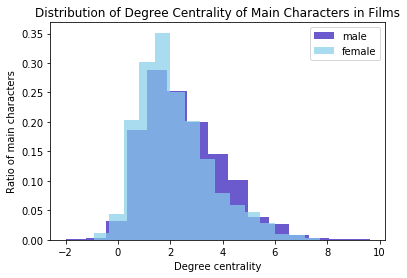

In [67]:
# degree centrality

male_df['degree'].hist(bins=15, color='slateblue', figsize=(6,4), grid=False, label='male', density=1)
female_df['degree'].hist(bins=15, color='skyblue', alpha=0.7, figsize=(6,4), grid=False, label='female', density=1)

plt.legend()
plt.title('Distribution of Degree Centrality of Main Characters in Films')
plt.xlabel('Degree centrality')
plt.ylabel('Ratio of main characters')
plt.savefig('../plots/degree.png')

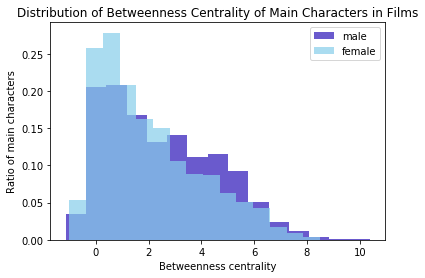

In [68]:
# betweenness centrality

male_df['betweenness'].hist(bins=15, color='slateblue', figsize=(6,4), grid=False, label='male', density=1)
female_df['betweenness'].hist(bins=15, color='skyblue', alpha=0.7, figsize=(6,4), grid=False, label='female', density=1)

plt.legend()
plt.title('Distribution of Betweenness Centrality of Main Characters in Films')
plt.xlabel('Betweenness centrality')
plt.ylabel('Ratio of main characters')
plt.savefig('../plots/betweenness.png')